# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

** Import pandas as pd.**

In [57]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

** Read Salaries.csv as a dataframe called df.**

In [3]:
df = pd.read_csv('Salaries.csv')

Input the data into pandas Profiling

In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report")

### EDA with Pandas Profiling

In [8]:
profile.to_widgets()

**What is the average BasePay ?**

In [15]:
df['BasePay'].mean()

66325.44884050643

** What is the highest amount of OvertimePay in the dataset ? **

In [17]:
df['OvertimePay'].max()

245131.88

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [19]:
df[df['EmployeeName']=='JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [20]:
df[df['EmployeeName']=='JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

** What is the name of highest paid person (including benefits)?**

In [27]:
df[df['TotalPayBenefits']== df['TotalPayBenefits'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [28]:
df[df['TotalPayBenefits']== df['TotalPayBenefits'].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [29]:
df.groupby('Year').mean()['BasePay']

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

** How many unique job titles are there? **

In [30]:
df['JobTitle'].nunique()

2159

** What are the top 5 most common jobs? **

In [32]:
df['JobTitle'].value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [40]:
sum(df[df['Year']==2013]['JobTitle'].value_counts() ==1)

202

In [53]:
df.drop('Notes', axis=1, inplace=True)
df.drop('Status', axis=1, inplace=True)

### Visualizing the data using various plot
General plotting using sns pairplot

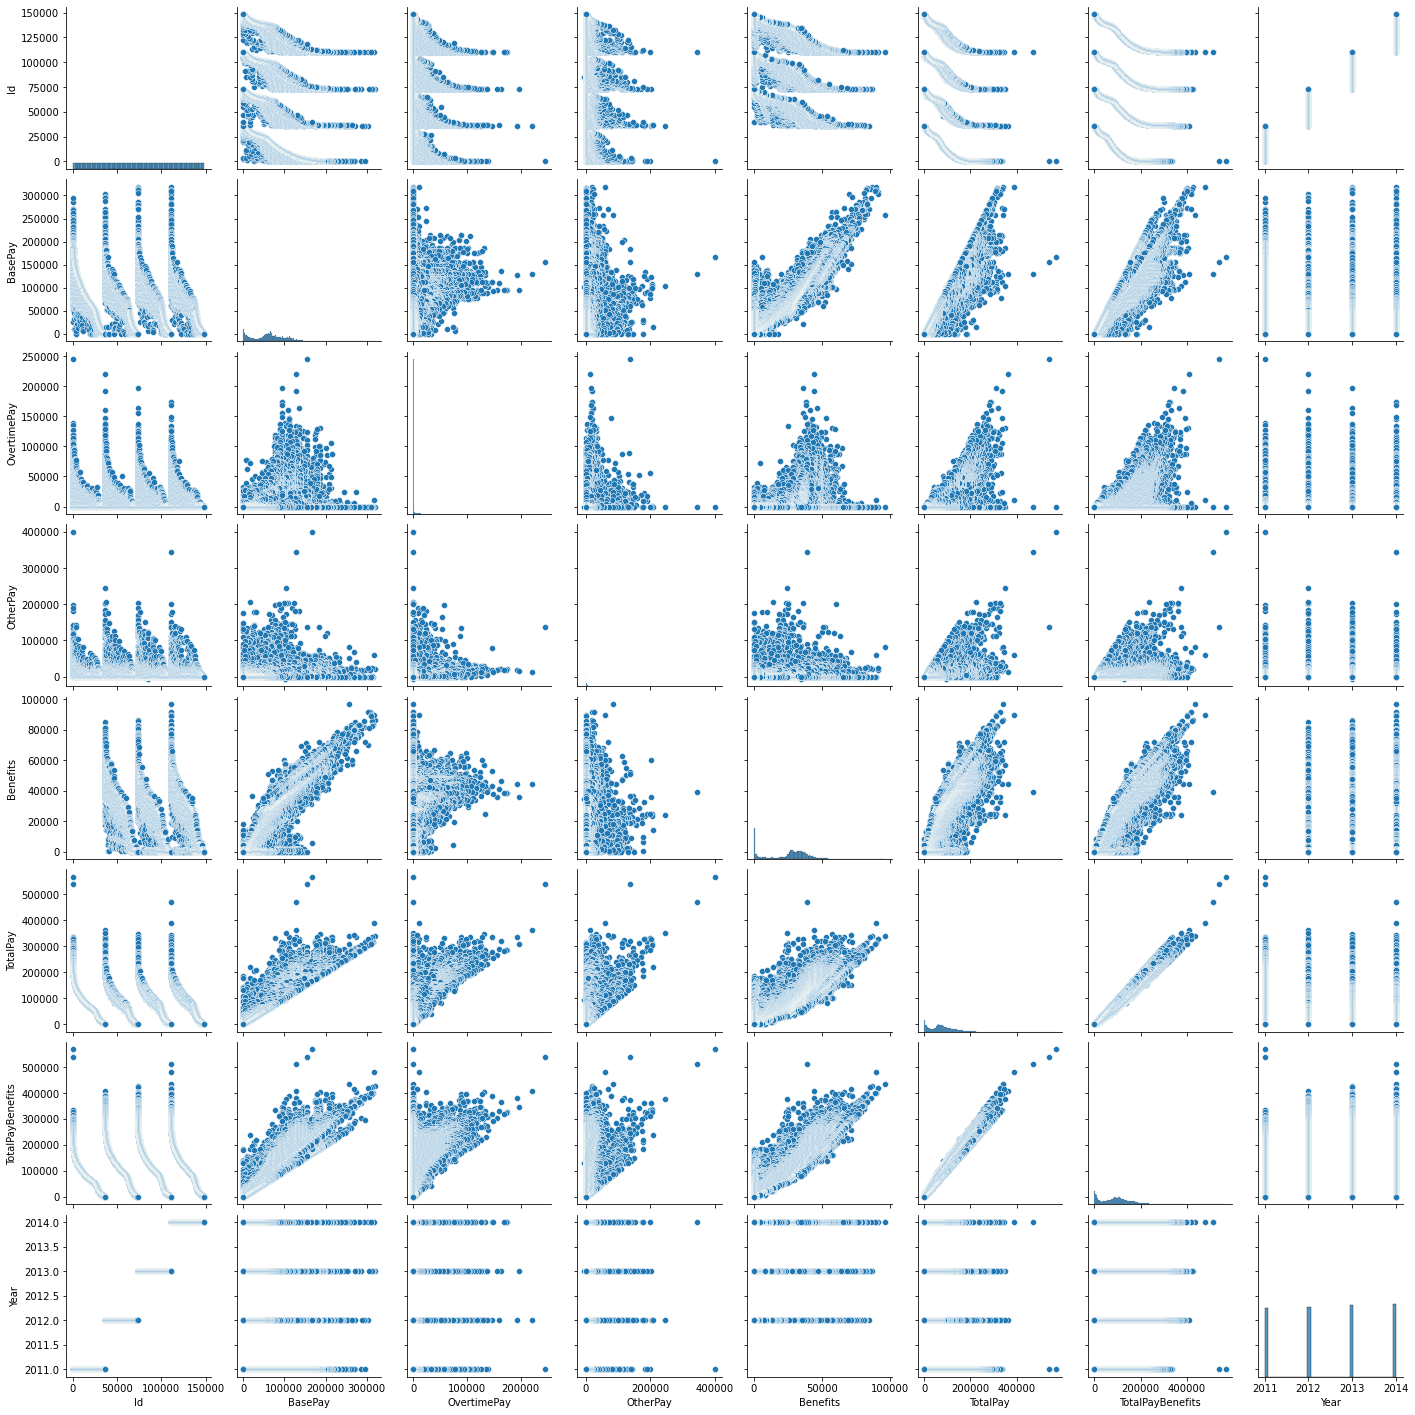

In [54]:
sns.pairplot(df)

Difference in Base Payment in every year

Text(0.5, 1.0, 'Base Payment over Year')

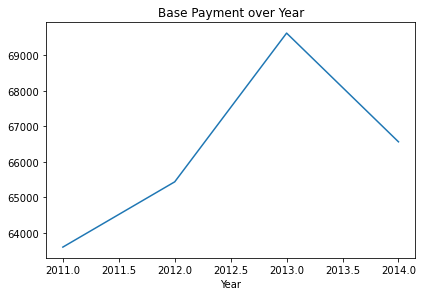

In [59]:
df.groupby('Year').mean()['BasePay'].plot()
plt.tight_layout()
plt.title('Base Payment over Year')

### Correlation between Total Pay with increasing Base Pay

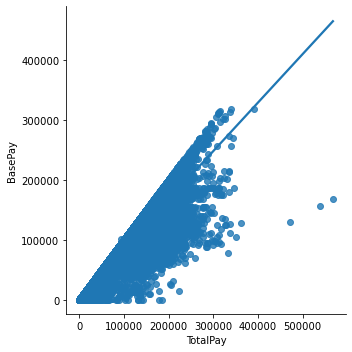

In [61]:
sns.lmplot(x='TotalPay', y='BasePay', data=df)
plt.tight_layout()

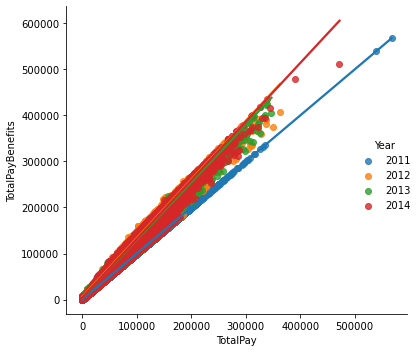

In [65]:
sns.lmplot(x='TotalPay', y='TotalPayBenefits', hue='Year', data=df)
plt.tight_layout()